<a href="https://colab.research.google.com/github/udaybhaskar717/Musify/blob/main/BCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install molmass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 1.5 MB/s 


In [2]:
import pandas as pd
import numpy as np
from molmass import Formula

In [3]:
data=pd.read_excel("/content/BCC_NEW.xlsx")


In [4]:
data

,Composition,Comment 1,Wt.% H
0,Nb1-xFex,(x=0.004-0.01),2.0-2.1
1,Nb.994Ge.006,NaN,92.1
2,Nb1-xSix,(x=0.01-0.026),2.0-2.1
3,Ni1-xCux,(x=0.1-0.5),0.4-1.2
4,Ni.8Cu.2,NaN,--
...,...,...,...
283,V0.56Ti0.20Cr0.12Mn0.12,NaN,1.85
284,V0.778Ti0.074Zr0.074Ni0.074,NaN,1.35
285,V0.77Ti0.10Cr0.06Fe0.06Zr,NaN,1.82
286,V0.40Ti0.225Cr0.325Fe0.05,NaN,0.75


In [5]:
data[['Composition','Comment 1','Wt.% H']]

,Composition,Comment 1,Wt.% H
0,Nb1-xFex,(x=0.004-0.01),2.0-2.1
1,Nb.994Ge.006,NaN,92.1
2,Nb1-xSix,(x=0.01-0.026),2.0-2.1
3,Ni1-xCux,(x=0.1-0.5),0.4-1.2
4,Ni.8Cu.2,NaN,--
...,...,...,...
283,V0.56Ti0.20Cr0.12Mn0.12,NaN,1.85
284,V0.778Ti0.074Zr0.074Ni0.074,NaN,1.35
285,V0.77Ti0.10Cr0.06Fe0.06Zr,NaN,1.82
286,V0.40Ti0.225Cr0.325Fe0.05,NaN,0.75


In [6]:
data['Comment 1'].shape-data['Comment 1'].isnull().sum()

array([66])

In [7]:
data['Comment 1'].head(20)

0      (x=0.004-0.01)
1                 NaN
2      (x=0.01-0.026)
3         (x=0.1-0.5)
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8           (x=0-0.4)
9                 NaN
10                NaN
11                NaN
12                NaN
13                NaN
14    (x=0.033-0.162)
15                NaN
16          (x=0-0.1)
17                NaN
18                NaN
19    (x=0.075-0.101)
Name: Comment 1, dtype: object

In [8]:
data['Wt.% H'].shape-data['Wt.% H'].isnull().sum()

array([288])

In [9]:
df=data[data["Wt.% H"] !='--']

In [10]:
df

,Composition,Comment 1,Wt.% H
0,Nb1-xFex,(x=0.004-0.01),2.0-2.1
1,Nb.994Ge.006,NaN,92.1
2,Nb1-xSix,(x=0.01-0.026),2.0-2.1
3,Ni1-xCux,(x=0.1-0.5),0.4-1.2
5,Ni.979Fe.021,NaN,1.6
...,...,...,...
283,V0.56Ti0.20Cr0.12Mn0.12,NaN,1.85
284,V0.778Ti0.074Zr0.074Ni0.074,NaN,1.35
285,V0.77Ti0.10Cr0.06Fe0.06Zr,NaN,1.82
286,V0.40Ti0.225Cr0.325Fe0.05,NaN,0.75


In [11]:
def remove_fn(m):
    return list(map(float,(''.join(i for i in m if i not in ['X','y','x','(',')','=',"&",'a','n','d',' '])).split('-')))

In [12]:
index=df[df["Comment 1"].notnull() ].index

In [13]:
index1=[i for i in df.index if i not in index]

In [14]:
d1=dict()
for t in index1:
    d1[df.loc[t,"Composition"]]=df.loc[t,"Wt.% H"]

In [15]:
l1=dict()
for i in index:
    l1[i]=remove_fn(df.loc[i,"Comment 1"])
print(l1)

{0: [0.004, 0.01], 2: [0.01, 0.026], 3: [0.1, 0.5], 8: [0.0, 0.4], 14: [0.033, 0.162], 16: [0.0, 0.1], 19: [0.075, 0.101], 26: [0.025, 0.075], 27: [0.05, 0.2], 31: [0.02, 0.05], 33: [0.02, 0.05], 40: [0.0, 0.075], 41: [0.025, 0.05], 43: [0.026, 0.083], 45: [0.05, 0.15], 49: [0.05, 0.4], 53: [0.04, 0.1], 55: [0.0, 0.1], 57: [0.025, 0.075], 59: [0.0, 0.1], 62: [0.0, 0.04], 63: [0.02, 0.05], 64: [0.01, 0.04], 67: [0.02, 0.125], 68: [0.11, 0.19], 71: [0.18, 0.33], 72: [0.11, 0.26], 73: [0.14, 0.69], 74: [0.02, 0.35], 76: [0.2, 0.8], 78: [0.2, 0.6], 79: [0.3, 0.8], 81: [0.0, 1.0], 85: [0.005, 0.008], 87: [0.01, 0.049], 88: [0.0, 0.1], 90: [0.001, 0.009], 91: [0.003, 0.011], 96: [0.001, 0.017], 98: [0.004, 0.006], 103: [0.34, 0.5], 116: [0.008, 0.01], 119: [0.23, 0.82], 122: [0.12, 0.25], 124: [0.049, 0.197], 137: [0.02, 0.09], 138: [0.01, 0.03], 139: [0.018, 0.085], 141: [0.05, 0.15], 143: [0.1, 0.3], 156: [0.0, 0.25], 159: [0.1, 0.9], 160: [0.1, 0.9], 169: [0.037, 0.1], 175: [0.2, 0.8], 17

In [16]:
l2=[]
for i in index:
    if type(df.loc[i,"Wt.% H"])==float:
        df.loc[i,"Wt.% H"]=str(df.loc[i,"Wt.% H"])+'-'+str(df.loc[i,"Wt.% H"])
    l2+=list(map(float,df.loc[i,"Wt.% H"].split('-')))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [17]:
X=pd.DataFrame(index=range(len(l1)),columns=["Composition"])

In [18]:
l3=[]
for i in index:
    string=df.loc[i,"Composition"]
    pos=string.find('-')
    #print(string)
    if (string[pos-1] !='1') or (string[pos-2:pos] =='.1'):
        u=""
        e=pos
        j=1
        while string[e-j] !='.':
            u+=string[e-j]
            j+=1
        k=l1[i]
        for h in k:
            x=string.replace("."+(u)[::-1]+'-x',str((float("0."+(u)[::-1])-h)))
            l3.append(x.replace('x',str(h)))
    else:
        k=l1[i]
        for h in k:
            x=string.replace('1-x',str((1-h)))
            l3.append(x.replace('x',str(h)))

In [19]:
d2=dict()
for g,r in zip(l3,l2):
    d2[g]=r


In [20]:
print(d2)

{'Nb0.996Fe0.004': 2.0, 'Nb0.99Fe0.01': 2.1, 'Nb0.99Si0.01': 2.0, 'Nb0.974Si0.026': 2.1, 'Ni0.9Cu0.1': 0.4, 'Ni0.5Cu0.5': 1.2, 'Pd1.0Ag0.0': 0.2, 'Pd0.6Ag0.4': 0.7, 'Pd0.967B0.033': 0.1, 'Pd0.838B0.162': 0.6, 'Pd1.0Bi0.0': 0.2, 'Pd0.9Bi0.1': 0.7, 'Pd0.925Ce0.075': 0.1, 'Pd0.899Ce0.101': 0.2, 'Pd0.975Cr0.025': 0.5, 'Pd0.925Cr0.075': 0.6, 'Pd0.95Cu0.05': 0.4, 'Pd0.8Cu0.2': 0.6, 'Pd0.98Mo0.02': 0.3, 'Pd0.95Mo0.05': 0.5, 'Pd0.98Nb0.02': 0.3, 'Pd0.95Nb0.05': 0.4, 'Pd0.975Ni.025Rh0.0': 0.6, 'Pd0.9Ni.025Rh0.075': 0.7, 'Pd0.85Ni.125Rh0.025': 0.6, 'Pd0.825Ni.125Rh0.05': 0.6, 'Pd0.974Pb0.026': 0.4, 'Pd0.917Pb0.083': 0.4, 'Pd0.95Pt0.05': 0.2, 'Pd0.85Pt0.15': 0.5, 'Pd0.95Rh0.05': 0.9, 'Pd0.6Rh0.4': 1.0, 'Pd0.96Ru0.04': 0.5, 'Pd0.9Ru0.1': 0.6, 'Pd1.0Sb0.0': 0.2, 'Pd0.9Sb0.1': 0.7, 'Pd0.975Sc0.025': 0.4, 'Pd0.925Sc0.075': 0.55, 'Pd1.0Ti0.0': 0.1, 'Pd0.9Ti0.1': 0.6, 'Pd1.0V0.0': 0.4, 'Pd0.96V0.04': 0.6, 'Pd0.98V0.02': 0.4, 'Pd0.95V0.05': 0.6, 'Pd0.99V0.01': 0.4, 'Pd0.98Y0.02': 0.3, 'Pd0.875Y0.125': 0

In [21]:
# Python code to merge dict using a single
# expression
def Merge(dict1, dict2):
	res = {**dict1, **dict2}
	return res
	
# Driver code
dict1 =d1
dict2 =d2
dict3 = Merge(dict1, dict2)
print(dict3)


{'Nb.994Ge.006': 92.1, 'Ni.979Fe.021': 1.6, 'Ni.943Fe.057': 1.4, 'Pd.75Ag.25': 0.4, 'Pd.9Ag.1': 0.5, 'Pd.8Ag.2': 0.4, 'Pd.7Ag.3': 0.3, 'Pd.6Ag.4': 0.2, 'Pd.95Bi.05': 0.4, 'Pd.947Ce.053': 0.3, 'Pd.942Ce.058': 0.4, 'Pd.95Co.05': 0.6, 'Pd.9Co.1': 0.5, 'Pd.9Cu.1': 0.5, 'Pd.95Cr.05': 0.6, 'Pd.972Ir.028': 0.5, 'Pd.942Ir.058': 0.4, 'Pd.927Ir.073': 0.1, 'Pd.975Mo.025': 0.5, 'Pd.85Ni.15': 0.5, 'Pd.95Ni.025Rh.025': 0.7, 'Pd.9Ni.05Rh.05': 0.6, 'Pd.825Ni.1Rh.075': 0.7, 'Pd.946Pb.054': 0.4, 'Pd.95Pt.05': 0.6, 'Pd.9Pt.1': 0.4, 'Pd.7Rh.3': 0.9, 'Pd.95Rh.05': 0.7, 'Pd.9Rh.1': 0.6, 'Pd.8Rh.2': 0.8, 'Pd.95Sb.05': 0.5, 'Pd.95Sc.05': 0.5, 'Pd.952Ti.048': 0.4, 'Pd.95U.05': 0.3, 'Pd.98V.02': 0.5, 'Pd.92Y.08': 0.5, 'Ti.95Cr.05': 3.5, 'Ti.93Mn.07': 3.8, 'Ti.5V.5': 3.88, 'Ti.435V.49Fe.075': 3.8, 'Ti.49Zr.51': 2.8, 'Ti.65Zr.35N.19': 1.9, 'Ti.81Zr.19N.25': 2, 'V.99B.01': 3.72, 'V.99Co.01': 3.4, 'V.855Cr.145': 2.3, 'V.99Mo.01': 3.4, 'V.99Nb.01': 3.5, 'V.8Nb.2': 3.1, 'V.991Ni.009': 3.62, 'V.96Si.04': 3.1, 'V.983Ta

In [22]:
new_data=pd.DataFrame(dict3,index=['Wt.% H',])

In [23]:
new_df=new_data.T

In [24]:
new_df

,Wt.% H
Nb.994Ge.006,92.1
Ni.979Fe.021,1.6
Ni.943Fe.057,1.4
Pd.75Ag.25,0.4
Pd.9Ag.1,0.5
...,...
Ti.28V.35Cr0.22Mn0.15,2.4
Ti0.24V.35Cr0.31000000000000005Mn.10,2.7
Ti0.28V.35Cr0.27Mn.10,2.7
Nb0.97Cr0.03,0.9


In [25]:
new_df.to_csv("BCC_newdata.csv")

In [26]:
index2=new_df.index

In [27]:
l4=[]
for i in index2:
    #print(i.find('.'))
    res = [j for j in range(len(i)) if i.startswith('.', j)]
    list1 = res
    list2 = range(len(res))

    zipped_lists = zip(list1, list2)
    sum = [x + y for (x, y) in zipped_lists]
    for l in sum:
        i = i[:l] + "0" + i[l:]
    l4.append(i)

In [28]:
new_df.index=l4

In [29]:
new_df

,Wt.% H
Nb0.994Ge0.006,92.1
Ni0.979Fe0.021,1.6
Ni0.943Fe0.057,1.4
Pd0.75Ag0.25,0.4
Pd0.9Ag0.1,0.5
...,...
Ti0.28V0.35Cr00.22Mn00.15,2.4
Ti00.24V0.35Cr00.31000000000000005Mn0.10,2.7
Ti00.28V0.35Cr00.27Mn0.10,2.7
Nb00.97Cr00.03,0.9


In [30]:
l5=[]
import re
for i in new_df.index:
    test_str =i
    res =re.findall(r'(\w+?)(\d+\.\d+)', test_str)
    l5+=[res]


In [31]:
len(l5)

312

In [32]:
l5

[[('Nb', '0.994'), ('Ge', '0.006')],
 [('Ni', '0.979'), ('Fe', '0.021')],
 [('Ni', '0.943'), ('Fe', '0.057')],
 [('Pd', '0.75'), ('Ag', '0.25')],
 [('Pd', '0.9'), ('Ag', '0.1')],
 [('Pd', '0.8'), ('Ag', '0.2')],
 [('Pd', '0.7'), ('Ag', '0.3')],
 [('Pd', '0.6'), ('Ag', '0.4')],
 [('Pd', '0.95'), ('Bi', '0.05')],
 [('Pd', '0.947'), ('Ce', '0.053')],
 [('Pd', '0.942'), ('Ce', '0.058')],
 [('Pd', '0.95'), ('Co', '0.05')],
 [('Pd', '0.9'), ('Co', '0.1')],
 [('Pd', '0.9'), ('Cu', '0.1')],
 [('Pd', '0.95'), ('Cr', '0.05')],
 [('Pd', '0.972'), ('Ir', '0.028')],
 [('Pd', '0.942'), ('Ir', '0.058')],
 [('Pd', '0.927'), ('Ir', '0.073')],
 [('Pd', '0.975'), ('Mo', '0.025')],
 [('Pd', '0.85'), ('Ni', '0.15')],
 [('Pd', '0.95'), ('Ni', '0.025'), ('Rh', '0.025')],
 [('Pd', '0.9'), ('Ni', '0.05'), ('Rh', '0.05')],
 [('Pd', '0.825'), ('Ni', '0.1'), ('Rh', '0.075')],
 [('Pd', '0.946'), ('Pb', '0.054')],
 [('Pd', '0.95'), ('Pt', '0.05')],
 [('Pd', '0.9'), ('Pt', '0.1')],
 [('Pd', '0.7'), ('Rh', '0.3')],
 

In [33]:
data_new=pd.DataFrame(np.zeros((312,1)),index=new_df.index,columns=["Total_Molecular_weight"])

In [34]:

for x,z in enumerate(l5):
    sum=0
    for y in z:
        #print(y)
        f = Formula(y[0])
        sum+=(f.mass*float(y[1]))
    #print(sum)
    data_new.iloc[x,0]=sum

In [35]:
f = Formula(y[0])
f.mass

51.9961

In [36]:
new_df["Wt.% H"].shape

(312,)

In [37]:
data_new["Wt.% H"]=new_df["Wt.% H"]

In [38]:
data_new.dropna(inplace=True)

In [39]:
data_new.to_csv("New_Data.csv")

In [40]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data_new)
X_scaled = scaler.transform(data_new)

In [41]:
X_new=pd.DataFrame(X_scaled,index=data_new.index,columns=data_new.columns)

In [42]:
X_new

,Total_Molecular_weight,Wt.% H
Nb0.994Ge0.006,-0.035924,17.064260
Ni0.979Fe0.021,-0.264188,-0.116712
Ni0.943Fe0.057,-0.264873,-0.154681
Pd0.75Ag0.25,0.057633,-0.344526
Pd0.9Ag0.1,0.056181,-0.325542
...,...,...
Ti0.28V0.35Cr00.22Mn00.15,-0.315798,0.035164
Ti00.24V0.35Cr00.31000000000000005Mn0.10,-0.315677,0.092117
Ti00.28V0.35Cr00.27Mn0.10,-0.316781,0.092117
Nb00.97Cr00.03,-0.043314,-0.249604


In [43]:
import seaborn as sns

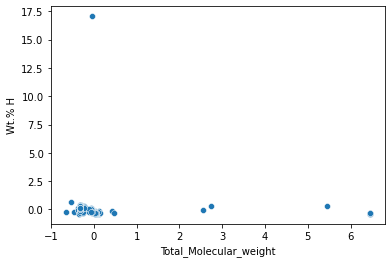

In [44]:
sns.scatterplot(x="Total_Molecular_weight",y="Wt.% H",data=X_new)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


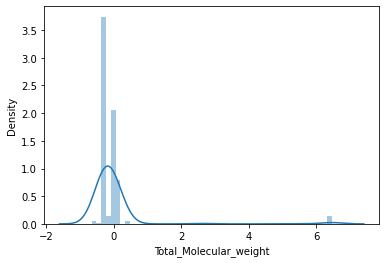

In [45]:
sns.distplot(X_new["Total_Molecular_weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


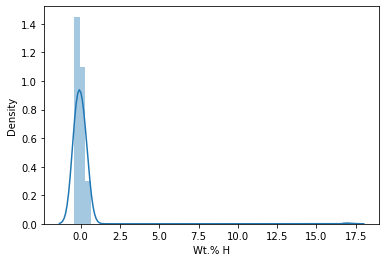

In [46]:
sns.distplot(X_new["Wt.% H"])

In [47]:
X_new.reset_index(inplace=True)

In [48]:
np.array(X_new["Total_Molecular_weight"])

array([-3.59239553e-02, -2.64187925e-01, -2.64873312e-01,  5.76333636e-02,
        5.61814121e-02,  5.71493797e-02,  5.81173474e-02,  5.90853151e-02,
        8.94888041e-02,  6.71502063e-02,  6.82763159e-02,  3.93435047e-02,
        2.34735651e-02,  2.65567353e-02,  3.70251500e-02,  7.12703718e-02,
        8.84742227e-02,  9.70761481e-02,  5.34639240e-02,  7.36321029e-03,
        4.66511380e-02,  3.80888316e-02,  2.15514862e-02,  9.15882285e-02,
        8.48446714e-02,  1.14475898e-01,  4.81662360e-02,  5.40389097e-02,
        5.28643749e-02,  5.05153055e-02,  6.03400236e-02,  3.46723402e-02,
        3.64279469e-02,  9.91967238e-02,  4.77971490e-02,  4.58483618e-02,
       -3.34771154e-01, -3.32842717e-01, -3.25876204e-01, -3.22082369e-01,
       -1.88355415e-01, -2.16934901e-01, -2.57684975e-01, -3.18283620e-01,
       -3.15067163e-01, -3.14579236e-01, -3.12592984e-01, -3.12796418e-01,
       -2.59503218e-01, -3.15135004e-01, -3.21712045e-01, -3.05666875e-01,
       -3.15765721e-01, -

In [49]:
X_new["Wt.% H"].shape

(312,)

In [50]:
X_new["Total_Molecular_weight"].shape


(312,)

In [51]:
np.random.seed(0)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new.iloc[:,1],X_new.iloc[:,2],train_size=0.8,random_state=42)

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(random_state=0)
X=np.array(X_train).reshape(-1,1)
y=np.array(y_train).reshape(-1,1)
regr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [55]:
regr.score(X,y)

0.86310502135308

In [56]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [57]:
X1=np.array(X_test).reshape(-1,1)
y1=np.array(y_test).reshape(-1,1)

In [58]:
regr.score(X1,y1) #0.732208132784083


0.40264500390292457

In [59]:
X_new

,index,Total_Molecular_weight,Wt.% H
0,Nb0.994Ge0.006,-0.035924,17.064260
1,Ni0.979Fe0.021,-0.264188,-0.116712
2,Ni0.943Fe0.057,-0.264873,-0.154681
3,Pd0.75Ag0.25,0.057633,-0.344526
4,Pd0.9Ag0.1,0.056181,-0.325542
...,...,...,...
307,Ti0.28V0.35Cr00.22Mn00.15,-0.315798,0.035164
308,Ti00.24V0.35Cr00.31000000000000005Mn0.10,-0.315677,0.092117
309,Ti00.28V0.35Cr00.27Mn0.10,-0.316781,0.092117
310,Nb00.97Cr00.03,-0.043314,-0.249604


In [60]:
l7=[]
for x in l5:
    for y in x:
        if y[0] not in l7:
            l7.append(y[0])

In [61]:
new_dataset=pd.DataFrame(np.zeros((len(l5),len(l7))),columns=l7)

In [62]:
new_dataset

,Nb,Ge,Ni,Fe,Pd,Ag,Bi,Ce,Co,Cu,...,C,Ru,Hf,W,Re,Os,Au,Al,Ga,In
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
for index,x in enumerate(l5):
    for y in x:
        if y[0] in l7:
            new_dataset.loc[index,y[0]]=float(y[1])

In [64]:
new_dataset.to_csv("New_BCC_data_set.csv")

In [65]:
new_dataset["Wt.% H"]=np.array(new_df["Wt.% H"])

In [66]:
new_dataset.to_csv("New_BCC.csv")

In [67]:
new_dataset

,Nb,Ge,Ni,Fe,Pd,Ag,Bi,Ce,Co,Cu,...,Ru,Hf,W,Re,Os,Au,Al,Ga,In,Wt.% H
0,0.994,0.006,0.000,0.000,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.1
1,0.000,0.000,0.979,0.021,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6
2,0.000,0.000,0.943,0.057,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
3,0.000,0.000,0.000,0.000,0.75,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
4,0.000,0.000,0.000,0.000,0.90,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
308,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7
309,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7
310,0.970,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9


In [68]:
elements = new_dataset.columns[:-1]

In [69]:
elements_={}
for i in elements:
    elements_[i]=(new_dataset[i]!=0).sum()

In [70]:
df_=pd.DataFrame.from_dict(elements_,orient="index")

In [71]:
values=[]
for i in df_.values:
    values.append(i[0])

In [72]:
colors = np.random.rand(elements.shape[0])

In [73]:
import matplotlib.pyplot as plt


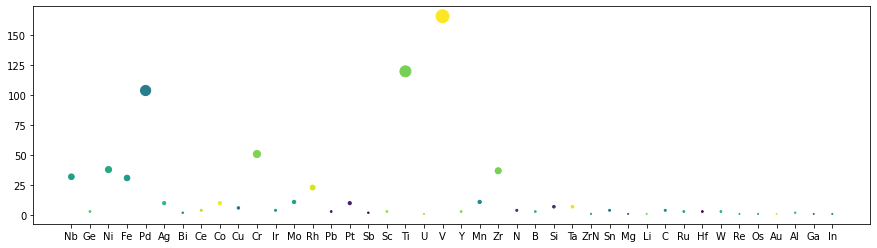

In [74]:
fig = plt.figure()
plt.scatter(x=df_.index,y=values,s=values,c=colors);
fig.set_figheight(4)
fig.set_figwidth(15)

In [75]:
higehst_prevalance=[]
for i in df_.index:
    if df_.loc[i,0]>=5:
       higehst_prevalance.append(i) 

In [76]:
X_new=new_dataset[higehst_prevalance]

In [77]:
X_new

,Nb,Ni,Fe,Pd,Ag,Co,Cu,Cr,Mo,Rh,Pt,Ti,V,Mn,Zr,Si,Ta
0,0.994,0.000,0.000,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,0.000,0.979,0.021,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,0.000,0.943,0.057,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,0.000,0.000,0.000,0.75,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,0.000,0.000,0.000,0.90,0.10,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.22,0.0,0.0,0.0,0.28,0.35,0.15,0.0,0.0,0.0
308,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.31,0.0,0.0,0.0,0.24,0.35,0.10,0.0,0.0,0.0
309,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.27,0.0,0.0,0.0,0.28,0.35,0.10,0.0,0.0,0.0
310,0.970,0.000,0.000,0.00,0.00,0.0,0.0,0.03,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


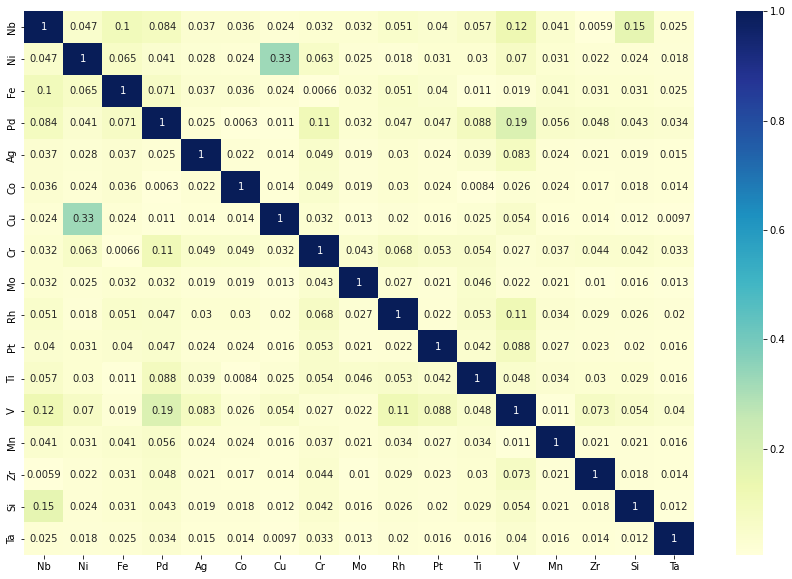

In [78]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(np.absolute(X_new.corr()), cmap="YlGnBu",annot=True)

In [79]:
#X_train,X_test,y_train,y_test=train_test_split(X_new,new_dataset.iloc[:,-1],train_size=0.7,random_state=42)

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_new,new_dataset.iloc[:,-1],train_size=0.85,random_state=42,shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.176, random_state= 8,shuffle=True) # 0.25 x 0.8 = 0.2

# Random Forest

In [81]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7662521094744756

In [106]:
rn_y_pred_train=rf.predict(X_train)

In [82]:
rf.score(X_val,y_val)

0.618193868568355

In [107]:
rn_y_pred_val=rf.predict(X_val)

In [83]:
rf.score(X_test,y_test)

0.8884401235466044

In [108]:
rn_y_pred_test=rf.predict(X_test)

In [84]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Hyper parameter Tuning

In [85]:

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=0)
param_grid = {'bootstrap': [False,True],
 'ccp_alpha': [0.0,0.035],
 'criterion': ['squared_error','absolute_error'],
 'max_depth': [None,10],
 'max_features':['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'min_weight_fraction_leaf':[0.0],
 'n_estimators': [100,150],
 'n_jobs': [None],
 'oob_score':[False],
 'random_state': [0],
 'verbose': [0],
 'warm_start': [False]}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1,return_train_score=True)

grid.fit(X_train, y_train)
print(grid.score(X_train,y_train))

0.7691328049762765


In [86]:
grid.score(X_val,y_val)

0.6392029000681784

In [112]:
rn1_y_pred_train=rf.predict(X_train)
rn1_y_pred_val=rf.predict(X_val)
rn1_y_pred_test=rf.predict(X_test)

In [87]:
print("R2 score:",grid.score(X_test,y_test))

R2 score: 0.883683610961254


# Gradient Boosting Regression

In [88]:
from sklearn import ensemble

In [89]:
params = {
    "n_estimators": 7000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=7000)

In [90]:
reg.score(X_train,y_train)

0.9991346381645769

In [91]:
reg.score(X_val,y_val)

0.6666713117139546

In [92]:
reg.score(X_test,y_test)

0.8684301553034798

In [114]:
xgb_y_pred_train=rf.predict(X_train)
xgb_y_pred_val=rf.predict(X_val)
xgb_y_pred_test=rf.predict(X_test)

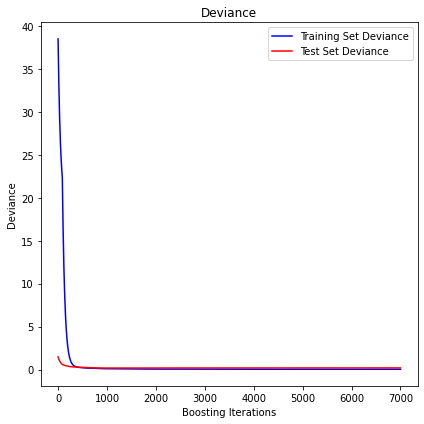

In [93]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

# Overall $ R^2 $ values of Train,test,validation datatest Using Average Ensembling method :


In [115]:
y_pred_train=(rn_y_pred_train+rn1_y_pred_train+xgb_y_pred_train)/3.0
y_pred_val=(rn_y_pred_val+rn1_y_pred_val+xgb_y_pred_val)/3.0
y_pred_test=(rn_y_pred_test+rn1_y_pred_test+xgb_y_pred_test)/3.0

In [131]:
from sklearn.metrics import r2_score

print("r2 score of train: ",r2_score(y_train, y_pred_train))
print("r2 score of validation: ",r2_score(y_val, y_pred_val))
print("r2 score of test : ",r2_score(y_test, y_pred_test),'\n')


print("Complete R2 score : ",(r2_score(y_train, y_pred_train)+r2_score(y_val, y_pred_val)+r2_score(y_test, y_pred_test))/3.0)

r2 score of train:  0.7662521094744756
r2 score of validation:  0.618193868568355
r2 score of test :  0.8884401235466044 

Complete R2 score :  0.7576287005298118


# Overall $ R^2 $ values of Train,test,validation datatest Using Stacking Methos:-

In [117]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=ab270ebd220bab37462017db21944dbc4f8e2a56184d28578785ef4095329fa7
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [128]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

base_models = [
    ('Random Forest',RandomForestRegressor()),
    ('GradientBoostingRegressor', ensemble.GradientBoostingRegressor(**params))
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

In [129]:
import time

for name, model in base_models:
    start_time = time.time()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    end_time = time.time()
    
    r2 = model.score(X_test, y_test)
    rmse = r2_score(y_test, prediction)
    
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
start_time = time.time()
stacked.fit(X_train, y_train)    
stacked_prediction = stacked.predict(X_test)
end_time = time.time()
stacked_r2 = stacked.score(X_test, y_test)
stacked_rmse =r2_score(y_test, stacked_prediction)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")


-------Random Forest-------
Coefficient of determination: 0.8718147452285102
Root Mean Squared Error: 0.8718147452285102
Computation Time: 0.32764434814453125
----------------------------------

-------GradientBoostingRegressor-------
Coefficient of determination: 0.8675750412976426
Root Mean Squared Error: 0.8675750412976426
Computation Time: 6.013569116592407
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.09190100647438548
Root Mean Squared Error: 0.09190100647438548
Computation Time: 19.34349298477173
----------------------------------


# Important Features

## Gradient Boosting

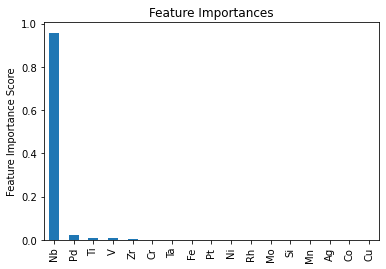

<Figure size 576x360 with 0 Axes>

In [94]:
feat_imp = pd.Series(reg.feature_importances_,X_new.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure (figsize=(8,5))
plt.show()

## Random Forest

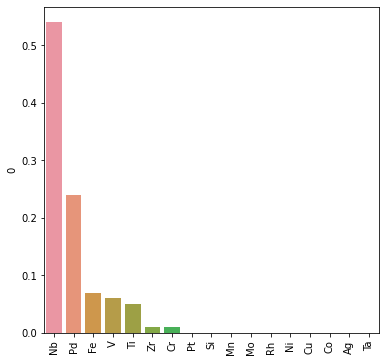

In [95]:
importance =grid.best_estimator_.feature_importances_
x=dict()
for i,v in enumerate(importance):
  #print('Feature : {0}  , Score{1} '.format(X_train.columns[i],round(v,2)))
  x[X_train.columns[i]]=round(v,2)
#print(x)
x=pd.DataFrame.from_dict(x,orient='index')
x.sort_values(0,ascending=False,inplace=True)
plt.figure (figsize=(6,6))
sns.barplot(x=x.index,y=0,data=x)
plt.xticks(rotation=90);

# Plotting

<Figure size 10800x10800 with 0 Axes>

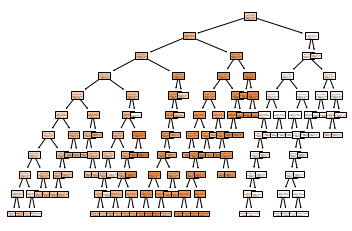

<Figure size 10800x10800 with 0 Axes>

In [96]:
from sklearn import tree

tree.plot_tree(grid.best_estimator_.estimators_[0],filled=True);
plt.figure(figsize=(150,150))

In [97]:
X_new.shape

(312, 17)

In [98]:
x_pred = np.linspace(0, 1,312*17)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1,17) # preprocessing required by scikit-learn functions

y_pred = grid.predict(x_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


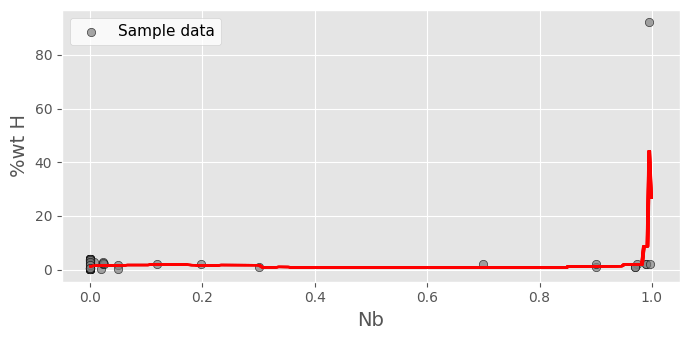

In [99]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred, color='r')
ax.scatter(X_train["Nb"], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('%wt H', fontsize=14)
ax.set_xlabel('Nb', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
#ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

In [100]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","green","blue","Grey"])

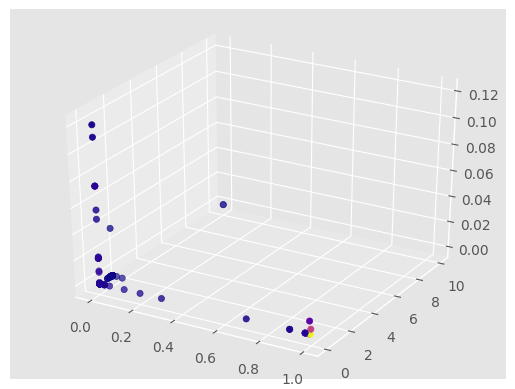

In [101]:
ax = plt.axes(projection='3d')
ax.scatter(X_train["Nb"],X_train["Pd"],X_train["Fe"],c=grid.predict(X_train),cmap='plasma');
# ax.view_init(60,10)